# Visualizing Soil Movement Data
This code was developed to create figures and tables containing descriptive statistics for the 2016-2020 soil movement study. 

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

##https://elitedatascience.com/python-seaborn-tutorial#step-10
##Pandas for managing datasets
import pandas as pd

##Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

##Seaborn for plotting and styling
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("RdBu")

import numpy as np
from sklearn.linear_model import LinearRegression

from scipy.stats import stats

In [30]:
##read dataset. index_col=False creates an temporary index
df = pd.read_csv(r'C:/Users/J-Nel/Documents/SMS/WitteC/2016rain.csv', index_col=False)
df.head()

,Unnamed: 0,date_time,rain_mm,site,year
0,1,2016-03-09 14:10:00,0.0,ARM,2016
1,2,2016-03-09 14:15:00,0.0,ARM,2016
2,3,2016-03-09 14:20:00,0.0,ARM,2016
3,4,2016-03-09 14:25:00,0.0,ARM,2016
4,5,2016-03-09 14:30:00,0.0,ARM,2016


In [32]:
count_series = df.groupby(["site"]).size()
count_series

site
ARM    68182
EIA    69649
RHO    69929
SPL    12315
WHI    42599
WOR    67976
dtype: int64

In [33]:
df['date_time'] = pd.to_datetime(df['date_time']).dt.date
df.head()

,Unnamed: 0,date_time,rain_mm,site,year
0,1,2016-03-09,0.0,ARM,2016
1,2,2016-03-09,0.0,ARM,2016
2,3,2016-03-09,0.0,ARM,2016
3,4,2016-03-09,0.0,ARM,2016
4,5,2016-03-09,0.0,ARM,2016


In [34]:
rain = df.groupby(['date_time', 'site']).agg('sum')
rain.head(30)
#rain.to_csv('C:/Users/J-Nel/Documents/SMS/WitteC/sum.csv')

# ln(average) by treatment
-Filter out no values and zeroes

-Group the data by treatment and create new CSV with averages grouped by treatment and year

-Plot results

***These are average values and I need to figure out how to get the standard deviation back in there. For figures plotted by treatment and plotted by site (next area) with hue treatment

Plot sums as well

Get your stupid statistical model built!! It isn't that hard dumbass

In [63]:
#df['wpd'] = df["g_pad"]*1000 / df["Days"]
#df["LNwpd"] = np.log(df["wpd"])
#made date_time index so I could use simple loc[] coding to filter on date, otherwise:
# 
df = pd.read_csv(r'C:/Users/J-Nel/Documents/SMS/WitteC/sum2020.csv', index_col='date')
df['rain_in'] = df['rain_m']*39.3701
df = df.loc['5/6/2020':'8/13/2020']
#df = df[(df['date'] > '5/10/2019') & (df['date'] < '8/19/2019')]
df.to_csv('C:/Users/J-Nel/Documents/SMS/WitteC/2020obsPeriod.csv')
df.head()

## removes no values and negative when dealing with log scale data
#df = df.dropna()
#df = df[df['rain_m'] > 0]

#df.head()

,site,Unnamed: 0,rain_m,year,rain_in
date,,,,,
5/6/2020,ARM,378557,0.000,220180,0.00000
5/6/2020,MAR,14567472,0.000,581760,0.00000
5/6/2020,MCN,29074608,0.000,581760,0.00000
5/6/2020,WHI,71711568,0.000,581760,0.00000
5/6/2020,WOR,87638832,0.001,581760,0.03937


In [61]:
#group data by treatment (control vs. strips) and calculate descriptive statistics
#grouped_data1 = df.groupby(['Treatment','Year'])
#grouped_data1 = df.groupby(['site'])
rain = df.groupby(['site'])['rain_mm'].agg('sum')
rain*39

#descr1 = grouped_data1['rain_mm'].aggregate([np.median, np.std, np.mean]).reset_index()
#descr = grouped_data1['rain_mm'].aggregate([np.mean]).reset_index()
#descr
#descr1

KeyError: 'Column not found: rain_mm'

In [35]:
na1 = np.exp(4.834939)
na2 = np.exp(4.874092)
na3 = np.exp(4.854584)
print(na1,na2,na3)


125.8309072874152 130.85528265510254 128.327295954159


3851.382745

In [37]:
(484.412118*0.000001) / (225*0.00000001)

215.29427466666667

In [44]:
#save this grouped data to a new csv file
descr1.to_csv('DescrTreatYearLN16_20.csv', index=False)

In [52]:
##read dataset. index_col=0 means the first column is our ID column
descr2 = pd.read_csv(r'DescrTreatYear16_20.csv', index_col=False)
#descr2['bMean'] = np.exp(descr2['mean'])
#descr2['bSTD'] = np.exp(descr2['std'])
descr2['bTons_ac'] = descr2['mean']/(907185000*225*0.0000000247105)
descr2['bTons_STD'] = descr2['std']/(907185000*225*0.0000000247105)
descr2['bPound_ac'] = descr2['bTons_ac']*2000
descr2['bPound_STD'] = descr2['bTons_STD']*2000
descr2.head(8)

,Treatment,Year,median,std,mean,bTons_ac,bTons_STD,bPound_ac,bPound_STD
0,control,2016,198.571429,937.621269,436.126091,0.086467,0.185895,172.934703,371.789854
1,control,2017,257.142857,2354.653813,907.030735,0.179830,0.466839,359.659956,933.678050
2,control,2018,331.593137,4653.075347,1698.816267,0.336811,0.922529,673.622360,1845.058620
3,control,2019,230.494118,3496.274338,1144.484188,0.226908,0.693179,453.816080,1386.358617
4,control,2020,116.801299,3044.633337,622.219640,0.123363,0.603636,246.725364,1207.271872
5,strips,2016,126.266234,545.439269,308.298792,0.061124,0.108140,122.248041,216.280062
6,strips,2017,187.333333,1832.337554,514.482389,0.102002,0.363283,204.004899,726.566829
7,strips,2018,304.166667,3865.680942,1808.723637,0.358602,0.766419,717.203331,1532.837406


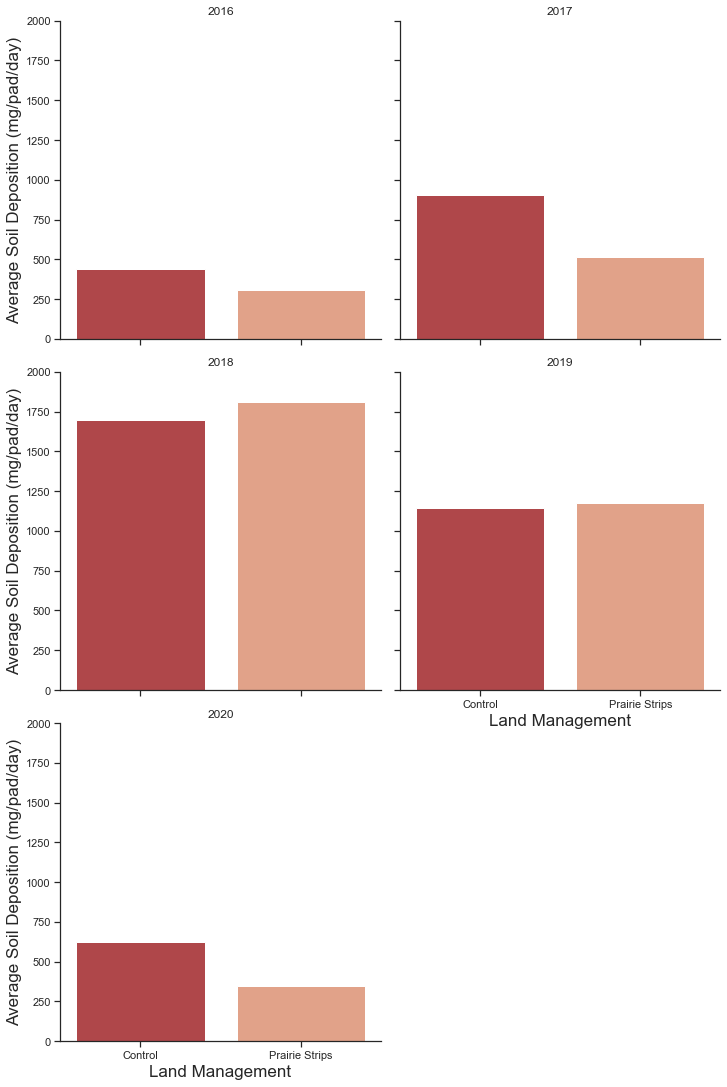

In [62]:
m = sns.catplot(x="Treatment", y="mean", data=descr2, col="Year", col_wrap=2, 
                kind="bar")

m.set_titles(size=18, pad=-5)
axes = m.axes.flatten()
axes[0].set_title("2016")
axes[1].set_title("2017")
axes[2].set_title("2018")
axes[3].set_title("2019")
axes[4].set_title("2020")
labels = ("Control", "Prairie Strips")
m.set_xlabels('Land Management', fontsize= 17)
m.set_xticklabels(labels, rotation=0)
m.set_ylabels('Average Soil Deposition (mg/pad/day)', fontsize= 17)
m.set_yticklabels()

In [65]:
import io

# errors must be relative to data (not absolute bounds)
descr2["lb"] = -descr2["std"]
descr2["ub"] = descr2["std"]
descr2.head(20)

,Treatment,Year,median,std,mean,bTons_ac,bTons_STD,bPound_ac,bPound_STD,lb,ub
0,control,2016,198.571429,937.621269,436.126091,0.086467,0.185895,172.934703,371.789854,-937.621269,937.621269
1,control,2017,257.142857,2354.653813,907.030735,0.179830,0.466839,359.659956,933.678050,-2354.653813,2354.653813
2,control,2018,331.593137,4653.075347,1698.816267,0.336811,0.922529,673.622360,1845.058620,-4653.075347,4653.075347
3,control,2019,230.494118,3496.274338,1144.484188,0.226908,0.693179,453.816080,1386.358617,-3496.274338,3496.274338
4,control,2020,116.801299,3044.633337,622.219640,0.123363,0.603636,246.725364,1207.271872,-3044.633337,3044.633337
5,strips,2016,126.266234,545.439269,308.298792,0.061124,0.108140,122.248041,216.280062,-545.439269,545.439269
6,strips,2017,187.333333,1832.337554,514.482389,0.102002,0.363283,204.004899,726.566829,-1832.337554,1832.337554
7,strips,2018,304.166667,3865.680942,1808.723637,0.358602,0.766419,717.203331,1532.837406,-3865.680942,3865.680942
8,strips,2019,249.183333,3554.596655,1177.833336,0.233520,0.704742,467.039836,1409.484848,-3554.596655,3554.596655
9,strips,2020,131.911490,749.104889,347.568286,0.068910,0.148519,137.819359,297.038481,-749.104889,749.104889


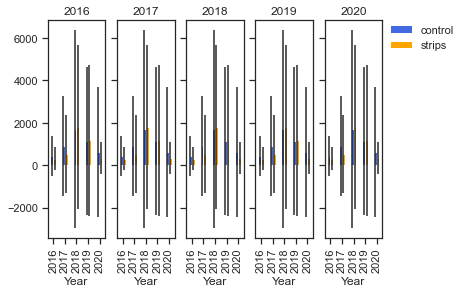

In [66]:
def func(x,y,h,lb,ub, **kwargs):
    data = kwargs.pop("data")
    # from https://stackoverflow.com/a/37139647/4124317
    errLo = data.pivot(index=x, columns=h, values=lb)
    errHi = data.pivot(index=x, columns=h, values=ub)
    err = []
    for col in errLo:
        err.append([errLo[col].values, errHi[col].values])
    err = np.abs(err)
    p = data.pivot(index=x, columns=h, values=y)
    p.plot(kind='bar',yerr=err,ax=plt.gca(), **kwargs)

fig, axes = plt.subplots(ncols=len(descr2.Year.unique()), sharey=True)
for ax, (name, group) in zip(axes,descr2.groupby("Year")):
    plt.sca(ax)
    func("Year", "mean", "Treatment", "lb", "ub", data=descr2, color=["royalblue", "orange"])
    plt.title(name)
    ax.get_legend().remove()
#ax.legend(bbox_to_anchor=(1.05, 0), loc='upper left', borderaxespad=0.)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

# ln(average) by site, treatment and year
-Group the data by treatment, site and year and create new CSV with averages grouped by treatment and year

-Plot results

In [11]:
grouped_data2 = df.groupby(['Treatment', 'Site', 'Year'])
descrA = grouped_data2['wpd'].aggregate([np.median, np.std, np.mean]).reset_index()
descrA.head()

,Treatment,Site,Year,median,std,mean
0,control,ARM,2016,162.500000,643.308941,347.375000
1,control,ARM,2017,216.428571,2334.769510,786.156349
2,control,ARM,2018,102.954545,249.846341,169.472743
3,control,ARM,2019,179.230952,725.696835,386.334841
4,control,ARM,2020,50.040000,181.192530,97.775130


In [12]:
#save this grouped data to a new csv file
descrA.to_csv('DescrTreatYearSite16_20.csv', index=False)

In [13]:
##read dataset. index_col=0 means the first column is our ID column
descrB = pd.read_csv(r'DescrTreatYearSite16_20.csv', index_col=False)
#descrB['bMean'] = np.exp(descrB['mean'])
#descrB['bSTD'] = np.exp(descrB['std'])
descrB['bTons_ac'] = descrB['mean']/(907185000*225*0.0000000247105)
descrB['bTons_STD'] = descrB['std']/(907185000*225*0.0000000247105)
descrB['bPound_ac'] = descrB['bTons_ac']*2000
descrB['bPound_STD'] = descrB['bTons_STD']*2000
descrB.head(20)

,Treatment,Site,Year,median,std,mean,bTons_ac,bTons_STD,bPound_ac,bPound_STD
0,control,ARM,2016,162.500000,643.308941,347.375000,0.068871,0.127544,137.742716,255.087790
1,control,ARM,2017,216.428571,2334.769510,786.156349,0.155865,0.462897,311.730295,925.793435
2,control,ARM,2018,102.954545,249.846341,169.472743,0.033600,0.049535,67.200104,99.070208
3,control,ARM,2019,179.230952,725.696835,386.334841,0.076596,0.143878,153.191250,287.756613
4,control,ARM,2020,50.040000,181.192530,97.775130,0.019385,0.035924,38.770240,71.847287
5,control,EIA,2016,320.931818,1600.517352,829.693939,0.164497,0.317322,328.994018,634.644427
6,control,EIA,2017,372.797101,1593.669062,731.061284,0.144942,0.315964,289.883748,631.928912
7,control,EIA,2018,853.181818,4812.043852,2850.745843,0.565195,0.954047,1130.390720,1908.093535
8,control,GUT,2019,92.500000,475.527812,275.214726,0.054565,0.094279,109.129396,188.558453
9,control,MCN,2017,155.595238,206.414302,194.506671,0.038563,0.040924,77.126671,81.848339


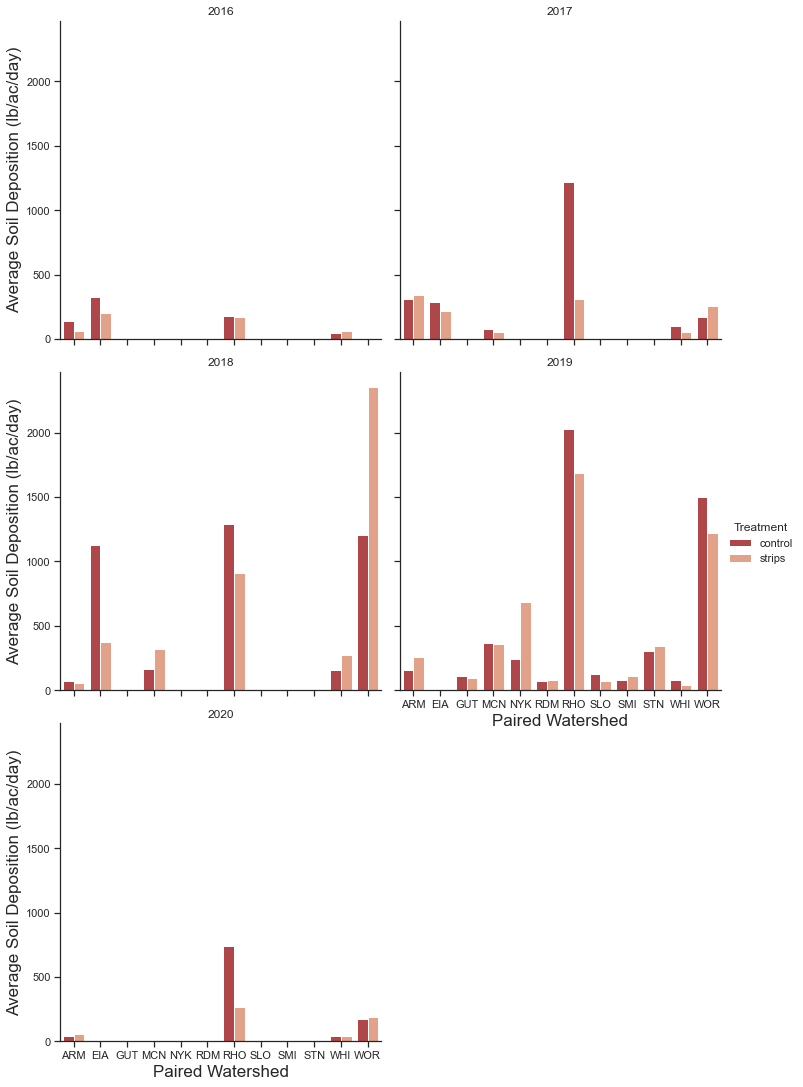

In [28]:
n = sns.catplot(x="Site", y="bPound_ac", hue="Treatment", data=descrB, col="Year", col_wrap=2, kind="bar", ci=None)

#fig, ax_array = plt.subplots(3,2)
#axes = ax_array.flatten()

#for ax, year in zip(axes, df['Year'].unique()):
#     sns.barplot("Site", 'wpd', hue='Treatment',
#                 data=df[df['Year'] == year], ax=ax)
        
n.set_titles(size=18, pad=-5)
axes = n.axes.flatten()
axes[0].set_title("2016")
axes[1].set_title("2017")
axes[2].set_title("2018")
axes[3].set_title("2019")
axes[4].set_title("2020")
n.set_xlabels('Paired Watershed', fontsize= 17)
n.set_ylabels('Average Soil Deposition (lb/ac/day)', fontsize= 17)

#n.axes.set_ytickslabels()
#n.set_yticklabels()
#axes.set_ytickslabels()

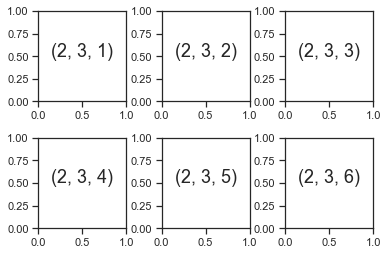

In [32]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')


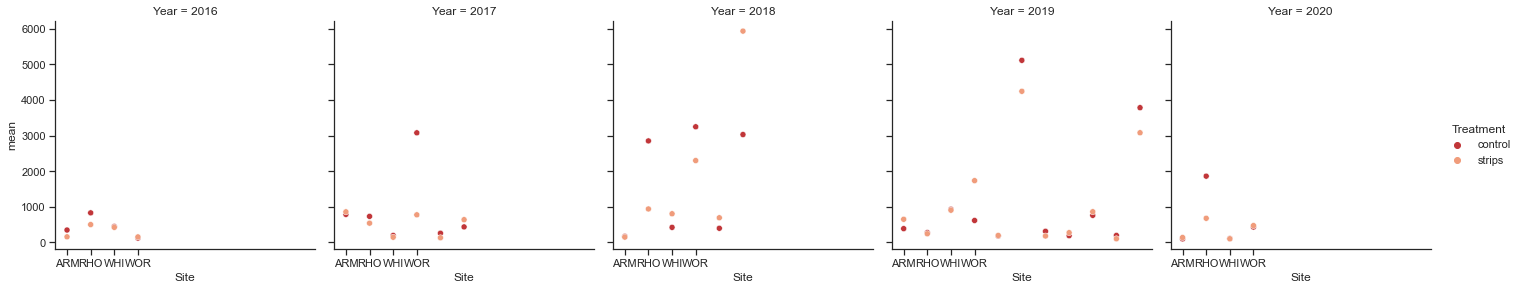

In [42]:
sns.relplot(x="Site", y="mean", col="Year", hue="Treatment", data=descrB, 
            height=4);

# Total soil movement by treatment and year

In [47]:
group2 = df.groupby(['Treatment','Year'])
descr3 = group2['mg_pad_day'].sum().reset_index()
descr3

,Treatment,Year,mg_pad_day
0,control,2016,1.046698e+05
1,control,2017,4.870755e+05
2,control,2018,8.969750e+05
3,control,2019,1.175385e+06
4,strips,2016,7.337416e+04
5,strips,2017,2.762770e+05
6,strips,2018,9.712846e+05
7,strips,2019,1.222591e+06


In [48]:
descr3['Tons_ac'] = descr3['mg_pad_day']/(907185000*225*0.0000000247105)
descr3['Pound_ac'] = descr3['Tons_ac']*2000
descr3

,Treatment,Year,mg_pad_day,Tons_ac,Pound_ac
0,control,2016,1.046698e+05,20.752070,41504.139944
1,control,2017,4.870755e+05,96.568698,193137.396474
2,control,2018,8.969750e+05,177.836303,355672.606176
3,control,2019,1.175385e+06,233.034555,466069.109945
4,strips,2016,7.337416e+04,14.547328,29094.656031
5,strips,2017,2.762770e+05,54.775315,109550.630710
6,strips,2018,9.712846e+05,192.569094,385138.188625
7,strips,2019,1.222591e+06,242.393675,484787.350159


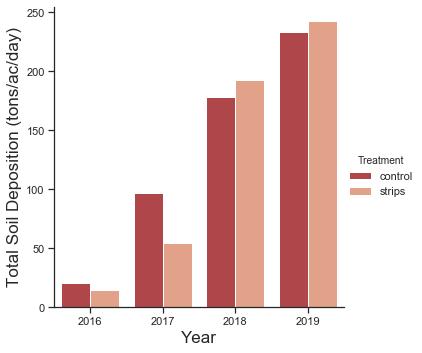

In [49]:
j = sns.catplot(x="Year", y="Tons_ac", hue="Treatment", data=descr3, kind="bar", ci=None)

j.set_titles(size=18, pad=-5)
axes = j.axes.flatten()
j.set_xlabels('Year', fontsize= 17)
j.set_ylabels('Total Soil Deposition (tons/ac/day)', fontsize= 17)

# Total soil movement by treatment and site and year

In [52]:
group3 = df.groupby(['Treatment','Year', 'Site'])
descr4 = group3['mg_pad_day'].sum().reset_index()
descr4

,Treatment,Year,Site,mg_pad_day
0,control,2016,ARM,20842.500001
1,control,2016,EIA,49781.636361
2,control,2016,RHO,26808.506493
3,control,2016,WHI,7237.142857
4,control,2017,ARM,70754.071429
5,control,2017,EIA,65795.515533
6,control,2017,MCN,17505.600414
7,control,2017,RHO,270896.471881
8,control,2017,WHI,22959.166668
9,control,2017,WOR,39164.678571


In [53]:
descr4['Tons_ac'] = descr4['mg_pad_day']/(907185000*225*0.0000000247105)
descr4['Pound_ac'] = descr4['Tons_ac']*2000
descr4

,Treatment,Year,Site,mg_pad_day,Tons_ac,Pound_ac
0,control,2016,ARM,20842.500001,4.132281,8264.562987
1,control,2016,EIA,49781.636361,9.869821,19739.641083
2,control,2016,RHO,26808.506493,5.315116,10630.231042
3,control,2016,WHI,7237.142857,1.434852,2869.704833
4,control,2017,ARM,70754.071429,14.027863,28055.726514
5,control,2017,EIA,65795.515533,13.044769,26089.537356
6,control,2017,MCN,17505.600414,3.470700,6941.400371
7,control,2017,RHO,270896.471881,53.708551,107417.102297
8,control,2017,WHI,22959.166668,4.551937,9103.873290
9,control,2017,WOR,39164.678571,7.764878,15529.756646


AttributeError: 'numpy.ndarray' object has no attribute 'set_ytickslabels'

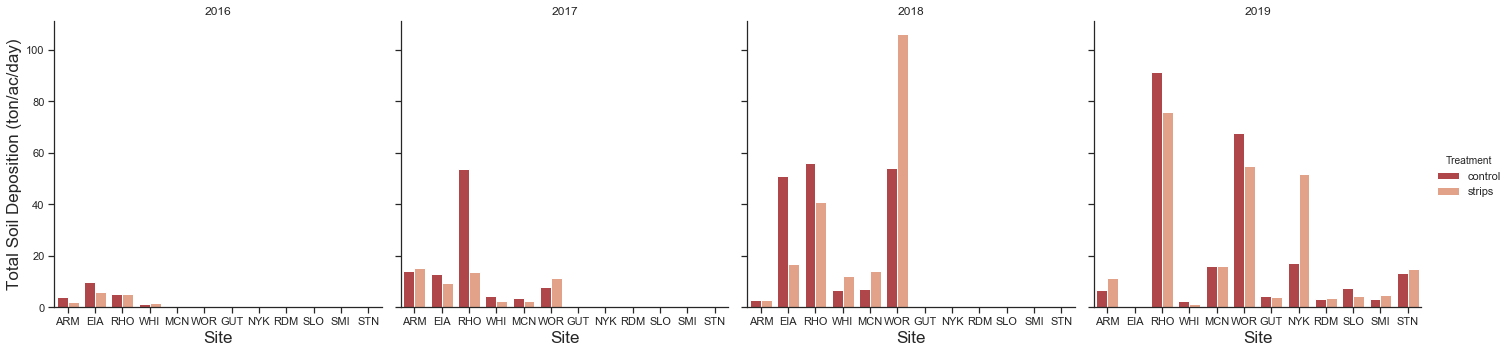

In [54]:
k = sns.catplot(x="Site", y="Tons_ac", hue="Treatment", data=descr4, col="Year", kind="bar", ci=None)

k.set_titles(size=18, pad=-5)
axes = k.axes.flatten()
axes[0].set_title("2016")
axes[1].set_title("2017")
axes[2].set_title("2018")
axes[3].set_title("2019")
k.set_xlabels('Site', fontsize= 17)
k.set_ylabels('Total Soil Deposition (ton/ac/day)', fontsize= 17)
#n.axes.set_ytickslabels()
#n.set_yticklabels()
axes.set_ytickslabels()